In [51]:
import pandas as pd
from cloudmesh.common.Shell import Shell
from cloudmesh.common.util import readfile
import os
from io import StringIO
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure


In [52]:
!pwd

/home/green/Desktop/cm/su21-reu-361/project


In [53]:
filename = ".o  benchmarks/gregor-5090X-RTX3090.log"


In [54]:
os.system(f"ls {filename}")

./code/benchmarks/gregor-5090X-RTX3090.log


0

In [148]:
def read(filename):
    lines = readfile(filename).splitlines()
    content = Shell.find_lines_with(lines, what="csv")
    content = "\n".join(content)
    df = pd.DataFrame()
    csv_stream = StringIO(content)
    df = pd.read_csv(csv_stream, sep=",", header=0)
    df = df.drop(columns=["# csv", "status", "uname.system", "platform.version"])
    return df

In [149]:
df=read(filename)

In [151]:
df

,timer,time,sum,start,tag,msg,uname.node,user
0,total-EOS-USD-2-0,2.720,2.720,2022-06-12 23:09:39,DOGE-USD,None,5090X-RTX3090,gregor
1,training-EOS-USD-2-0,2.303,2.303,2022-06-12 23:09:40,DOGE-USD,None,5090X-RTX3090,gregor
2,prediction-EOS-USD-2-0,0.191,0.191,2022-06-12 23:09:42,DOGE-USD,None,5090X-RTX3090,gregor
3,RMSE-EOS-USD-2-0,0.000,0.000,2022-06-12 23:09:42,DOGE-USD,1.3022665740837391,5090X-RTX3090,gregor
4,total-EOS-USD-2-1,1.491,1.491,2022-06-12 23:09:42,DOGE-USD,None,5090X-RTX3090,gregor
...,...,...,...,...,...,...,...,...
795,RMSE-DOGE-USD-225-3,0.000,0.000,2022-06-12 23:55:08,DOGE-USD,0.013700710930753857,5090X-RTX3090,gregor
796,total-DOGE-USD-225-4,22.495,22.495,2022-06-12 23:55:08,DOGE-USD,None,5090X-RTX3090,gregor
797,training-DOGE-USD-225-4,21.990,21.990,2022-06-12 23:55:08,DOGE-USD,None,5090X-RTX3090,gregor
798,prediction-DOGE-USD-225-4,0.229,0.229,2022-06-12 23:55:30,DOGE-USD,None,5090X-RTX3090,gregor


In [152]:
rmse = df.copy()
rmse = rmse[rmse['timer'].str.contains('RMSE')]
rmse[['rest', 'name', 'unit', 'epoch', 'i', ]] = rmse['timer'].str.rsplit('-', 4, expand=True)
rmse[['rest', 'epoch', 'i', ]] = rmse['timer'].str.rsplit('-', 2, expand=True)
rmse["rmse"] = rmse["msg"].astype("float")
rmse["epoch"] = rmse["epoch"].astype("int")
rmse = rmse.drop(columns=["time", "sum", "start", "rest", "msg", "unit", "tag"])
rmse

,timer,uname.node,user,name,epoch,i,rmse
3,RMSE-EOS-USD-2-0,5090X-RTX3090,gregor,EOS,2,0,1.302267
7,RMSE-EOS-USD-2-1,5090X-RTX3090,gregor,EOS,2,1,1.429720
11,RMSE-EOS-USD-2-2,5090X-RTX3090,gregor,EOS,2,2,1.391311
15,RMSE-EOS-USD-2-3,5090X-RTX3090,gregor,EOS,2,3,1.363798
19,RMSE-EOS-USD-2-4,5090X-RTX3090,gregor,EOS,2,4,1.126530
...,...,...,...,...,...,...,...
783,RMSE-DOGE-USD-225-0,5090X-RTX3090,gregor,DOGE,225,0,0.007687
787,RMSE-DOGE-USD-225-1,5090X-RTX3090,gregor,DOGE,225,1,0.012367
791,RMSE-DOGE-USD-225-2,5090X-RTX3090,gregor,DOGE,225,2,0.009004
795,RMSE-DOGE-USD-225-3,5090X-RTX3090,gregor,DOGE,225,3,0.013701


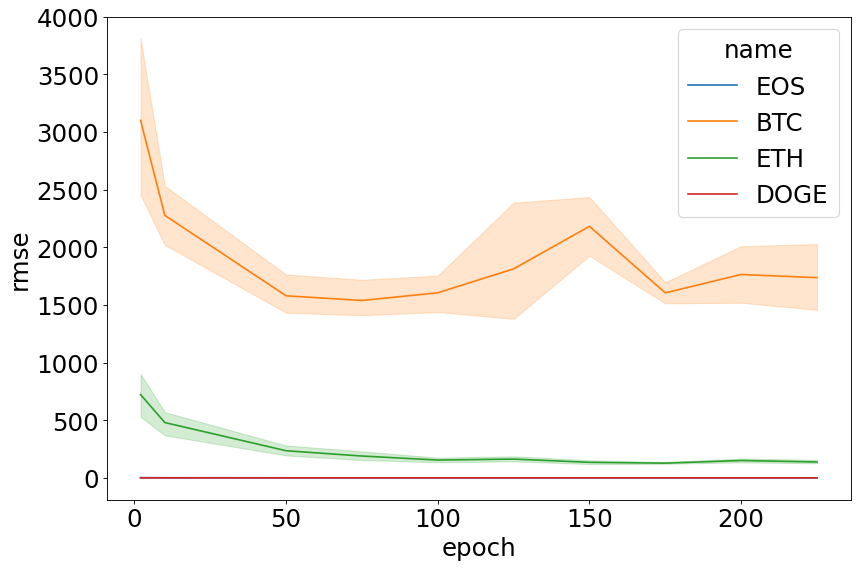

In [154]:
figure(figsize=(12, 8), dpi=80)
plt.rcParams.update({'font.size': 22})

ax = sns.lineplot(data=rmse, x="epoch", y="rmse", hue="name")
plt.show()

In [164]:
def timer_plot(t, name):
    df_t = df.copy()
    df_t = df_t[df_t['timer'].str.contains(t)]
    df_t[['rest', 'name', 'unit', 'epoch', 'i', ]] = df_t['timer'].str.rsplit('-', 4, expand=True)
    df_t[['rest', 'epoch', 'i', ]] = df_t['timer'].str.rsplit('-', 2, expand=True)
    df_t[t] = df_t["time"].astype("float")
    df_t["epoch"] = df_t["epoch"].astype("int")
    df_t = df_t.drop(columns=["time", "sum", "start", "rest", "msg", "unit", "tag"])
    df_t[name] = df_t["name"]
    return df_t


In [171]:
def format_plot(dpi=80, font=22, y="Time in s", x="Epochs"):
    figure(figsize=(12, 8), dpi=dpi)
    plt.rcParams.update({'font.size': font})
    plt.ylabel(y)
    plt.xlabel(x)


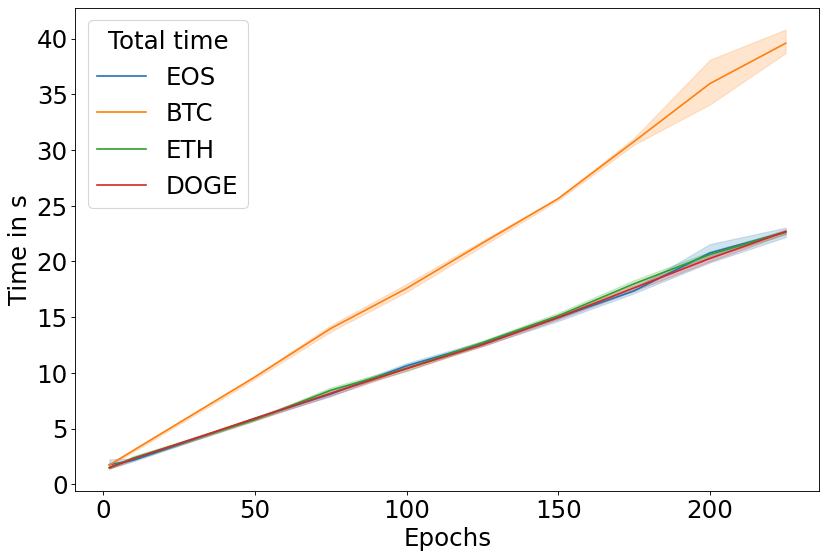

In [172]:
total = timer_plot("total", "Total time")
format_plot(dpi=80, font=22, y="Time in s", x="Epochs")
ax = sns.lineplot(data=total, x="epoch", y="total", hue="Total time")
plt.show()

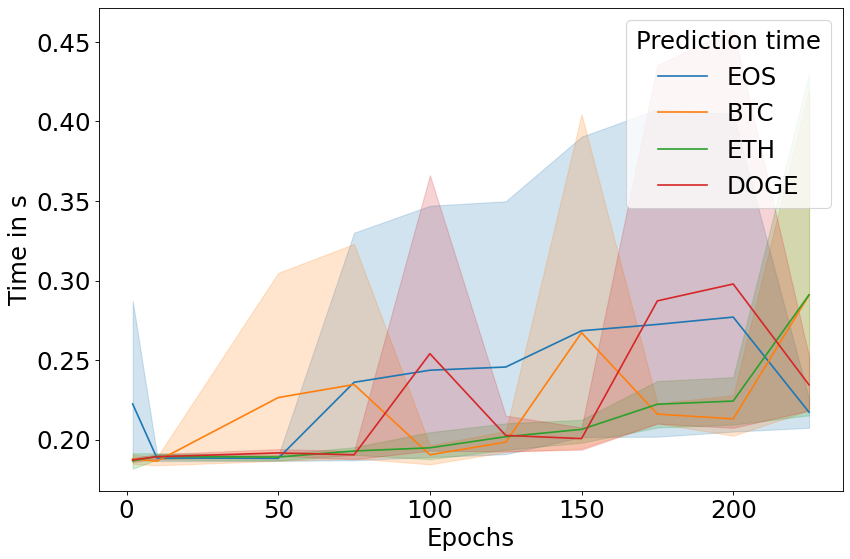

In [173]:
prediction = timer_plot("prediction", "Prediction time")
format_plot(dpi=80, font=22, y="Time in s", x="Epochs")
ax = sns.lineplot(data=prediction, x="epoch", y="prediction", hue="Prediction time")
plt.show()

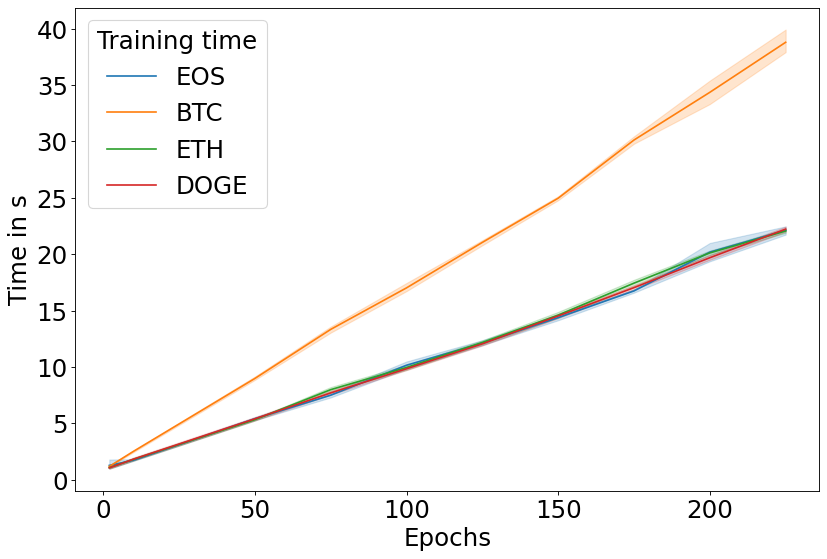

In [174]:
training = timer_plot("training", "Training time")
format_plot(dpi=80, font=22, y="Time in s", x="Epochs")
ax = sns.lineplot(data=training, x="epoch", y="training", hue="Training time")
plt.show()

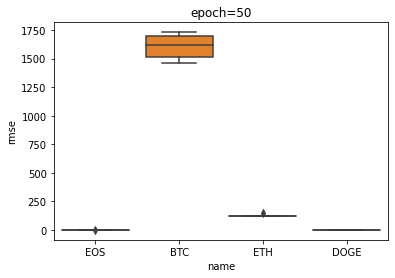

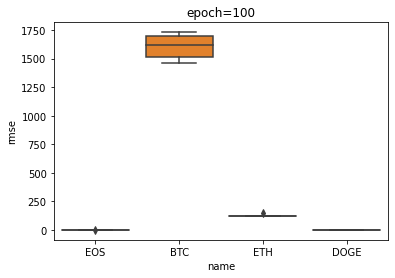

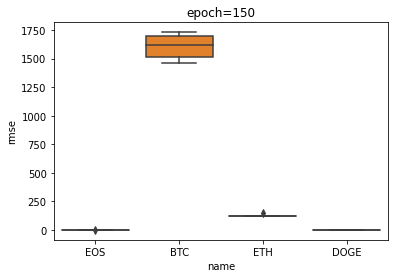

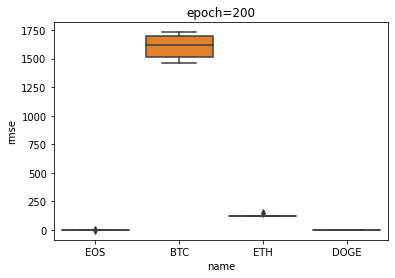

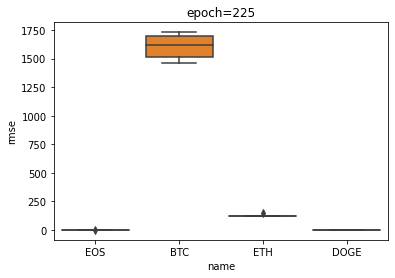

In [121]:
for e in [50, 100, 150, 200, 225]:
    epoch = rmse[rmse['epoch'].str.contains('175')]
    ax = sns.boxplot(x="name", y="rmse", data=epoch)
    ax.set_title(f"epoch={e}")
    plt.show()

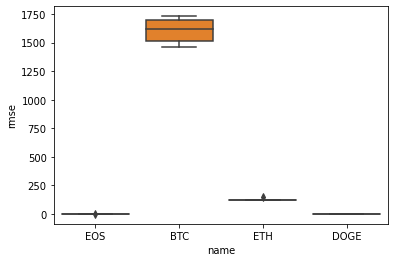